<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## Random Numbers

### Real and Pseudo Random Numbers

real random number generators use random physical processes like radioactivity or noise in circuits 

pseudo RNGs use algorithms that can produce a stream of numbers that approximate real random numbers. it takes the mersenne twister 10^19937 -1 times before the numbers repeat.

### NumPy’s PRNG

In [2]:
np.random.rand()                # Give one number

0.5872681092189067

In [3]:
np.random.rand(10)              # Give ten numbers`

array([0.53711964, 0.92071216, 0.26059248, 0.01867609, 0.06342701,
       0.65357927, 0.28093337, 0.07263006, 0.98694969, 0.18201084])

In [4]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.12316501, 0.18944064],
       [0.91094094, 0.90482639],
       [0.74997766, 0.94716687],
       [0.89476476, 0.05248717],
       [0.17355264, 0.30684178]])

In [15]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
print(np.sum(random_numbers < .5) / n * 100)
# The numbers less than .25 must be about 25%
print(np.sum(random_numbers < .25) / n * 100)
# The numbers more than .75 must be about 25%
print(np.sum(random_numbers > .75) / n * 100)

50.32
24.15
25.230000000000004


###  simple graphical test

Text(0, 0.5, 'Value of random number')

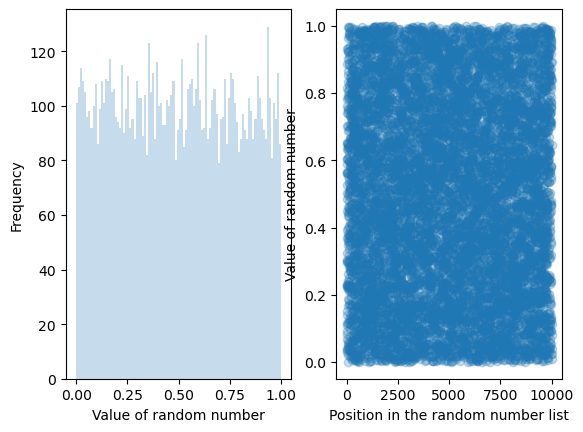

In [25]:
from matplotlib import pyplot as plt
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

###  Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

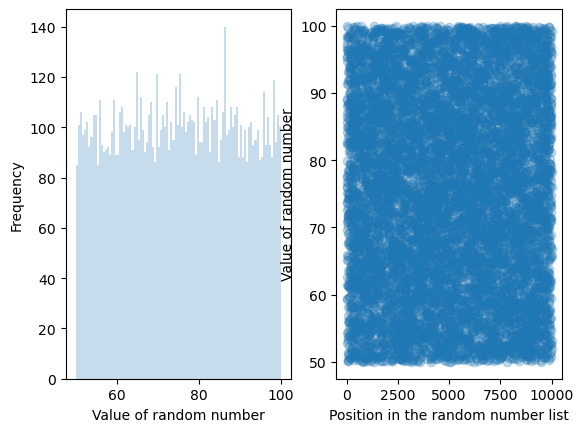

In [27]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


###  ‘seeding’ a PRNG

In [33]:
print(np.random.randint(0, 100, 10))     # Ten integers between 0 and 100
print(np.random.randint(0, 100, 10))     # Another ten integers between 0 and 100
print(np.random.seed(1234))              # Specifying a seedprint(
print(np.random.randint(0, 100, 10))     # Ten integers between 0 and 100
print(np.random.seed(1234))
print(np.random.randint(0, 100, 10))     # Same ten integers between 0 and 100

[30 43 30 26 58 92 69 80 73 47]
[50 76 37 34 38 67 11  0 75 80]
None
[47 83 38 53 76 24 15 49 23 26]
None
[47 83 38 53 76 24 15 49 23 26]


## Simulating a Magic-8 Ball

In [36]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: My reply is no.

Q: Will I be in trouble?
A: Signs point to yes.



## Flipping Coins

### A fair coin

In [37]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [38]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Tails', 'Head', 'Head', 'Tails', 'Head', 'Tails',
       'Head', 'Head'], dtype='<U5')

In [40]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.50%


### A biased coin

In [41]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.80%


### A flipping experiment

In [44]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats


AttributeError: module 'matplotlib.pyplot' has no attribute 'rcParam'

In [46]:
plt.rcParam['figure.figsize'] = (10,5) #why O.O
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

AttributeError: module 'matplotlib.pyplot' has no attribute 'rcParam'

In [73]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [6]:
import numpy as np 
n, x = 27, 0.0111
mmax = 6
m = np.arange(mmax +1)
ntrials = 10000
pbin = np.empty(mmax +1)
for r in m:
    pbin[r] = np.sum(np.random.binomial(n,x,ntrials)== r)/ntrials

nCm = np.empty(mmax +1)
nCm[0] =1 
for r in m[1:]:
    nCm[r] = nCm[r-1]*(n-r+1)/r
p= nCm*x**m *(1-x)**(n-m)

print('Abundances of C60 as (13C)[m](12C)[60-m]')
print('m "exact" Estimated')
print('-'*24)

for r in m:
    print('{:1d} {:6.4f} {:6.4f}'.format(r, p[r], pbin[r]))
    
##probability of no C13 is 0.7398. ## altered from another code 




Abundances of C60 as (13C)[m](12C)[60-m]
m "exact" Estimated
------------------------
0 0.7398 0.7365
1 0.2242 0.2262
2 0.0327 0.0349
3 0.0031 0.0032
4 0.0002 0.0003
5 0.0000 0.0000
6 0.0000 0.0000


In [ ]:
X ~ (27, 0.0111)
E[X]=np=0.2997
Variance = V(X) = p(1-p) = 0.01097679
SD = 0.104770177054351
When X = 0, 
P(X =0) = 27C0*(0.0111)**0 * (0.9889)**27
        = 1*1*(0.9889)**27
        = 0.73979974
## the math. 